# Installing necessary libraries
To run this notebook the following modules are required.

In [ ]:
! pip install requests
! pip install matplotlib

# Import the necessary modules and libraries
After you have installed the modules, import them.

In [9]:
import requests  # Import the requests module to make HTTP requests
import matplotlib.pyplot as plt  # Import the pyplot module for plotting graphs

# Build helper functions to run the code
First, let's build a function that counts the number of entries for an incoming term.

In [10]:
def get_count_of_entries(
        search_term: str, 
        filter: str = 'dataset', 
        url: str = 'https://opendata.bayern/api/hub/search/search',
        make_statements: bool = True
    ):
    """
    Fetch the number of entries for a given term.
    :param search_term: a sting of the terms you want to search for
    :param filter: the filter to use in the API request
    :param url: url to be requested
    :return: The count of entries for the given search term
    """
    
    # Display the name of the term currently being processed
    if make_statements:
        print(f'Processing: {search_term}')  
    # Create parameters for the API request
    payload = {'q': search_term, 'filter': filter}  

    # Send the GET request including the set parameters
    response = requests.get(url, params=payload)

    # Check if the request was successful
    if response.status_code != 200:
        print('Failed to connect to the website')  # Print error message if request failed
        return  # Return from the function without proceeding further

    infos = response.json()  # Parse JSON response from the API
    return infos['result']['count']  # Return count of entries for the search

# Lets run this for a few terms
Let's define a few terms and corresponding colors which are gonna used for chart plotting later on.

In [11]:
# define dict of terms and corresponding colors
terms = {
    'Windenergie': {'color': '#e6194b', 'count': 0},
    'Verkehr': {'color': '#3cb44b', 'count': 0},
    'Schlösser': {'color': '#ffe119', 'count': 0},
    'Photovoltaik': {'color': '#4363d8', 'count': 0},
    'Bevölkerung': {'color': '#f58231', 'count': 0}
}

now lets add a count to the dict

In [12]:

# Loop through each term in the list
for term in terms:
    val = get_count_of_entries(term)  # Fetch count of entries for the term
    if val is None:  # If no count is received, skip to the next iteration
        val = 0
    terms[term]['count'] = val  # Store received count in the list

Processing: Windenergie
Processing: Verkehr
Processing: Schlösser
Processing: Photovoltaik
Processing: Bevölkerung


Finally, lets plot our results

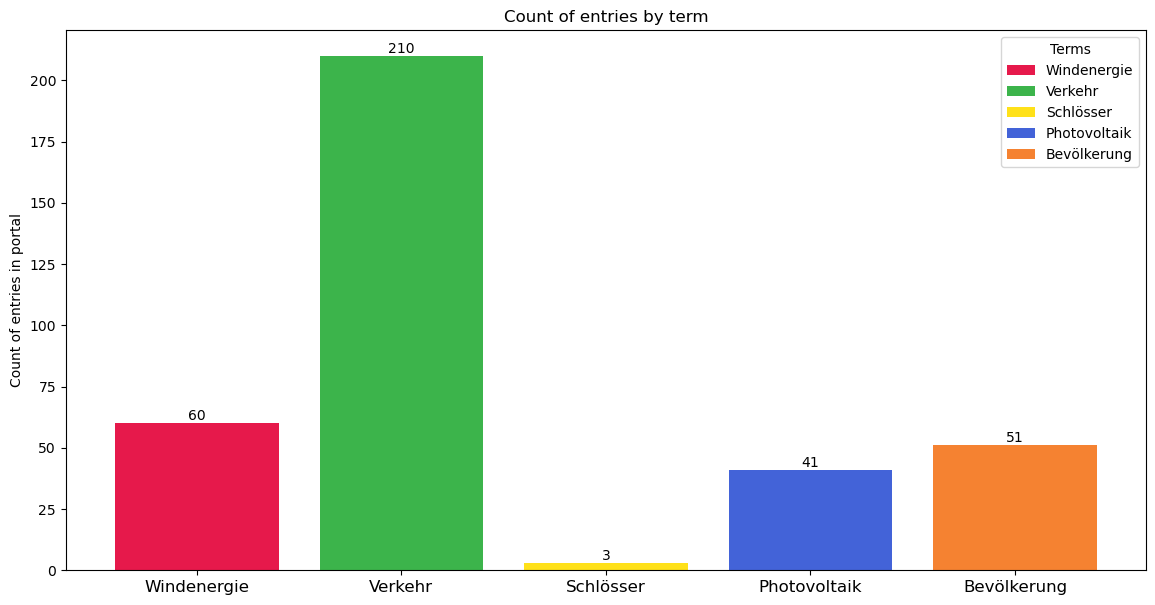

In [13]:
# Create a figure for the plot with increased size
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes((.05, .05, .90, .90))  # Set axes for the figure

# Plot a bar chart for each term with their respective counts
xvals = [term for term in terms]
colors, count_entries = zip(*[[terms[term]['color'], terms[term]['count']] for term in terms])
ax.bar(xvals, count_entries, label=xvals, color=colors)

# Annotate each bar in the bar chart with its respective count
for i, v in enumerate(count_entries): 
    ax.text(i , v, str(v), ha='center', va='bottom')

# Set the y-label and title for the bar chart
ax.set_ylabel('Count of entries in portal')
ax.set_title('Count of entries by term')

# Rotate and align x-axis labels for better visibility
plt.xticks(rotation=0, ha='center', fontsize=12)

ax.legend(title='Terms')  # Display legend for the bar chart

plt.show()  # Display the plot
